Prepare Association rules data set 

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 


Dataset: Book.csv

In [ ]:
#Load the dependencies
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import numpy as  np
import matplotlib.pyplot as plt

In [ ]:
book=pd.read_csv("/content/book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


The data is Encoded in binary. Therefore, no preprocessing is required.

In [ ]:
book.shape

(2000, 11)

There are 2000 entries of the purchase of 11 different genres of books.

In [ ]:
frequent_books05 = apriori(book, min_support=0.05, use_colnames=True)
frequent_books_1 = apriori(book, min_support=0.1, use_colnames=True)
frequent_books_2 = apriori(book, min_support=0.2, use_colnames=True)
frequent_books_3 = apriori(book, min_support=0.3, use_colnames=True)

print(frequent_books05.shape[0])
print(frequent_books_1.shape[0])
print(frequent_books_2.shape[0])
print(frequent_books_3.shape[0])


100
39
8
2


*   Support 0.05: We have got 100 rules (too many rules to analyse)
*   Support 10%: 39 rules (Will be a good choice)
*   Support 20% and 30%: Very few rules (not a good idea to use this support threshold)





In [ ]:
frequent_books_1.sort_values('support',ascending=False)

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
10,0.2560,"(CookBks, ChildBks)"
1,0.2475,(YouthBks)
5,0.2410,(ArtBks)
4,0.2145,(RefBks)
14,0.1950,"(GeogBks, ChildBks)"
22,0.1925,"(CookBks, GeogBks)"


In this data, we have set of transactions that occurs atleast 200(10%) of times among all 2000 transactions. 
Example:
*   43% of time people have purchased CookBks and 42% of times ChildBks
*   Index 33: 15% of times people have purchased all three books(ChildBks, GeogBks, CookBks).



In [ ]:
rules = association_rules(frequent_books_1, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


I chose the 0.6 as minimum confidence value. In other words, when book X is brought, we can say that the probability of buying movie(s) Y is 60% or more.

In [ ]:
#Filter the values having lift>1.5
rules=rules[rules['lift']>1.5]
#Sort the values
rules=rules.sort_values('lift',ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
39,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
40,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
47,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
46,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
26,(RefBks),"(CookBks, ChildBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
37,"(GeogBks, ChildBks)",(ArtBks),0.1950,0.2410,0.1020,0.523077,2.170444,0.055005,1.591452
41,"(CookBks, ArtBks)",(DoItYBks),0.1670,0.2820,0.1015,0.607784,2.155264,0.054406,1.830626
30,"(CookBks, ChildBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
33,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273


If we examine our 39th index value,

The probability of buying ChildBks and ArtBks is 16%, while the probability of buying GeogBks is 27%, and the support for both of them is measured as 10%.
62% of those who bought ChildBks and ArtBk also bought Geogbooks.
Their correlation is 1.9. Means, we can say these books are strongly dependent.

In [ ]:
rules=rules[['antecedents','consequents','support','confidence','lift']]
rules

,antecedents,consequents,support,confidence,lift
12,(ItalCook),(CookBks),0.1135,1.000000,2.320186
39,"(ChildBks, ArtBks)",(GeogBks),0.1020,0.627692,2.274247
40,"(CookBks, DoItYBks)",(ArtBks),0.1015,0.541333,2.246196
47,"(CookBks, ArtBks)",(GeogBks),0.1035,0.619760,2.245509
46,"(CookBks, GeogBks)",(ArtBks),0.1035,0.537662,2.230964
26,(RefBks),"(CookBks, ChildBks)",0.1225,0.571096,2.230842
37,"(GeogBks, ChildBks)",(ArtBks),0.1020,0.523077,2.170444
41,"(CookBks, ArtBks)",(DoItYBks),0.1015,0.607784,2.155264
30,"(CookBks, ChildBks)",(GeogBks),0.1495,0.583984,2.115885
33,(GeogBks),"(CookBks, ChildBks)",0.1495,0.541667,2.115885


## Visualising the results in plots

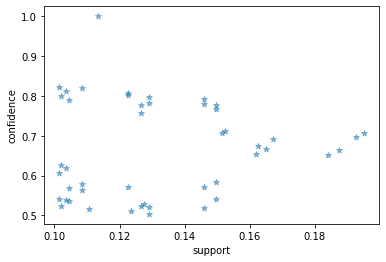

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(rules.support, rules.confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

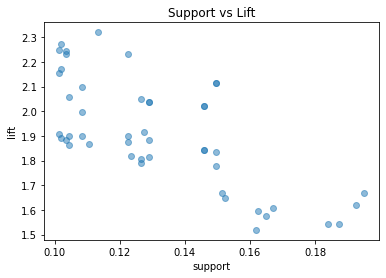

In [ ]:
plt.scatter(rules.support, rules.lift, alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

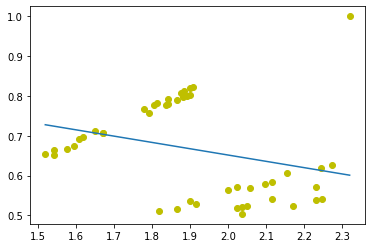

In [ ]:
import numpy as np
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))